# State Detection Visualization
In this notebook, we visualize predicted state detections.

In [41]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [42]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import plot_state_detection

sns.set_theme()
sns.set_color_codes()

import os


We start by loading a data set and the competitor results.

In [43]:
dataset = "TSSB"
competitor = "CLaP"

In [44]:
if dataset == "TSSB":
    df_data = load_tssb_datasets()
elif dataset == "HAS":
    df_data = load_has_datasets()
else:
    df_data = load_datasets(dataset)
    
df_data

,dataset,window_size,change_points,labels,time_series
0,Adiac,10,"[572, 1012, 1232]","[0, 1, 2, 4]","[0.9614412457648591, 0.8692107351566405, 0.759..."
1,ArrowHead,10,[753],"[0, 1]","[0.05752188882548289, 0.08284899792454914, 0.1..."
2,Beef,50,[705],"[0, 1]","[0.4512759522369589, 0.4557238177439642, 0.464..."
3,BeetleFly,10,[1280],"[0, 1]","[0.7196187944802506, 0.649219323259071, 0.5877..."
4,BirdChicken,20,[1280],"[0, 1]","[0.9251509485227413, 0.8719850886823856, 0.827..."
5,Car,20,"[577, 1154, 1550]","[0, 1, 2, 3]","[0.9172344302092137, 0.810341530567422, 0.6839..."
6,CBF,20,"[384, 704]","[1, 0, 2]","[0.1546700334043504, 0.2834036928903969, 0.237..."
7,Chinatown,10,[],[0],"[0.4287627631861364, 0.282851265989841, 0.2283..."
8,ChlorineConcentration,10,[2365],"[0, 2]","[0.7707792771047987, 0.4974526316583445, 0.373..."
9,CinCECGTorso,10,"[2663, 5121]","[1, 2, 3]","[0.5189685555595134, 0.5191500487908336, 0.519..."


In [45]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores = pd.read_csv(f"../../experiments/state_detection/{dataset}_{competitor}.csv.gz", converters=converters)
df_scores.sort_values(by="ami_score", ascending=False)

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami_score
46,MiddlePhalanxTW,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
7,Chinatown,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
19,DodgerLoopDay,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
31,Herring,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
68,UMD,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
57,ShapeletSim,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000
49,NonInvasiveFetalECGThorax2,"[1687, 4124, 6233, 8108, 10358, 12420]","[1689, 4120, 6239, 8107, 10358, 12402]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.996,0.993
48,NonInvasiveFetalECGThorax1,"[1687, 4124, 6233, 8108, 10358]","[1693, 4118, 6237, 8108, 10341]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.995,0.990
69,UWaveGestureLibraryAll,"[1801, 3395, 4960, 6584]","[1800, 3408, 4957, 6600]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.992,0.986
56,ShapesAll,"[1280, 2560, 3840, 5120]","[1244, 2556, 3841, 5120]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0.987,0.981


Now, we plot the state detection for a given time series.

<Axes: >

<Figure size 640x480 with 0 Axes>

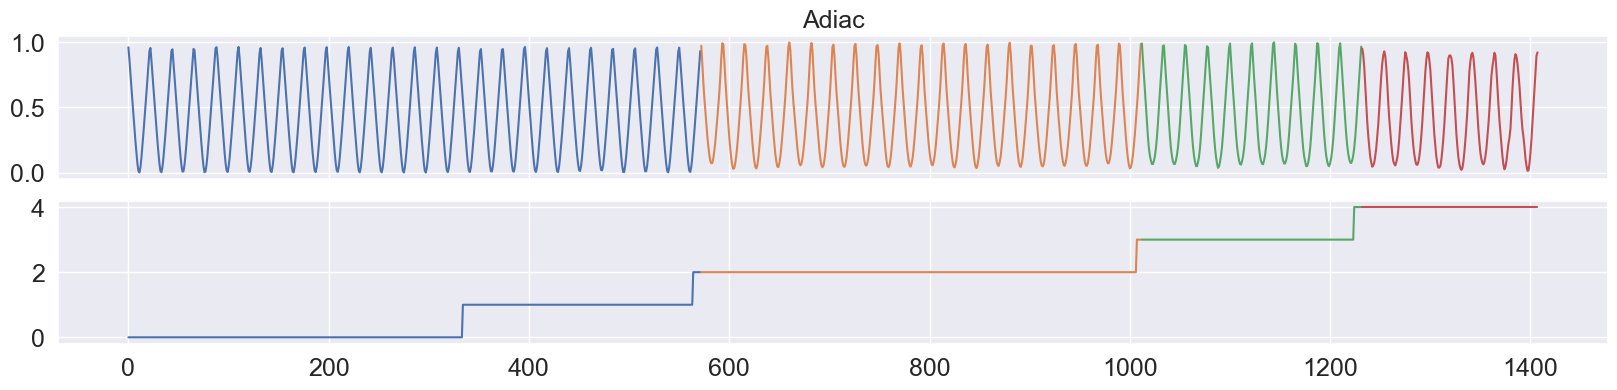

In [58]:
idx = 0 # 83 120
data_row = df_data.iloc[idx]

plot_state_detection(data_row.dataset, data_row.time_series, df_scores.iloc[idx].found_labels, change_points=data_row.change_points, labels=data_row.labels, file_path="../../tmp/clap_example.pdf")